# TP2 ADM : Analyse de données (ACP) avec Python
### GHAZEL Hassen, HALVICK Thomas
### Polytech Lyon | 4A Info

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### *Question 1*

In [8]:
# Importation du fichier CSV
data = pd.read_csv("./data/villes.csv", sep=';')
# Valeurs
X = data.iloc[:, 1:13].values
# Nom des villes
labels = data.iloc[:, 0].values

print(X,labels)

[[ 7.7  8.7 10.5 12.6 15.9 19.8 22.  22.2 20.3 16.3 11.8  8.7]
 [ 4.2  4.9  7.9 10.4 13.6 17.  18.7 18.4 16.1 11.7  7.6  4.9]
 [ 4.6  5.4  8.9 11.3 14.5 17.2 19.5 19.4 16.9 12.5  8.1  5.3]
 [ 1.1  2.2  6.4  9.7 13.6 16.9 18.7 18.3 15.5 10.4  5.7  2. ]
 [ 7.6  8.  10.8 12.  14.7 17.8 19.7 19.9 18.5 14.8 10.9  8.2]
 [ 5.6  6.6 10.3 12.8 15.8 19.3 20.9 21.  18.6 13.8  9.1  6.2]
 [ 6.1  5.8  7.8  9.2 11.6 14.4 15.6 16.  14.7 12.   9.   7. ]
 [ 2.6  3.7  7.5 10.3 13.8 17.3 19.4 19.1 16.2 11.2  6.6  3.6]
 [ 1.3  2.6  6.9 10.4 14.3 17.7 19.6 19.  15.9 10.5  5.7  2.1]
 [ 0.5  1.6  5.7  9.  13.  16.4 18.9 18.3 15.3 10.1  4.6  0.5]
 [ 1.5  3.2  7.7 10.6 14.5 17.8 20.1 19.5 16.7 11.4  6.5  2.3]
 [ 2.4  2.9  6.   8.9 12.4 15.3 17.1 17.1 14.7 10.4  6.1  3.5]
 [ 3.1  3.9  7.4  9.9 13.3 16.8 18.4 17.8 15.3 10.7  6.7  3.8]
 [ 2.1  3.3  7.7 10.9 14.9 18.5 20.7 20.1 16.9 11.4  6.7  3.1]
 [ 5.5  6.6 10.  13.  16.8 20.8 23.3 22.8 19.9 15.  10.2  6.9]
 [ 5.6  6.7  9.9 12.8 16.2 20.1 22.7 22.3 19.3 14.6 10.

### *Question 2*

#### *a)*

In [18]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

cumulative_variances = np.cumsum(pca.explained_variance_ratio_)

percent = 0.9
n_components = np.argmax(cumulative_variances >= percent) + 1
print("Nombres d'axes obtenus : ", n_components)

print(pca.components_[:n_components])

Nombres d'axes obtenus :  2
[[ 0.27151028  0.28846164  0.3010811   0.30354174  0.28353089  0.27841907
   0.27290295  0.28757774  0.30472022  0.3038548   0.29242808  0.2729549 ]
 [ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
  -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]]


#### *b)*

Donner une interprétation des deux premiers axes principaux.
Le premier axe représente l'écart à la moyenne de la température pour chaque ville.

Le second axe représente l'écart à la moyenne pour les mois les plus froids (1 à 3 et 9 à 12).

#### *c)*

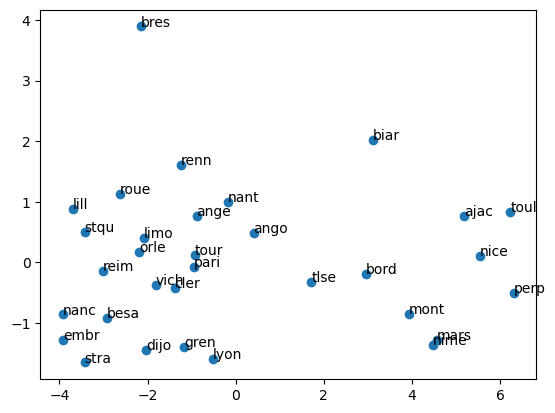

In [15]:
X_pca = pca.transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1]) 
for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]): 
    plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show() 

#### *d)*

l'axe principale represente l'écart a la moyenne pour chaque ville


1/sqrt(p) = 1/sqrt(12) = 0.2886751345948129
les mois utilisables sont : 
- janvier
- fevrier
- mai
- juin
- juillet
- aout 
- novembre
- decembre


L'axe de l'ordonnée represente l'influence des saisons: 
 - les valeurs negatif reprensete les mois de mai, juin ,juillet, aout c'est a dire que les villes sont plus chaud en été et froid en hiver
 - les valeurs positif reprensete les mois de janvier, fevrier, novembre, decembre c'est a dire que les villes sont plus froid en été et chaud en hiver

#### *e)*

In [23]:
def fullAnalysisPCA(fichier,nb_col):
    
    data = pd.read_csv(fichier, sep=';')

    X = data.iloc[:, 1:nb_col].values
    # Nom des villes
    labels = data.iloc[:, 0].values

    # On centre et on réduit les données
    ss = StandardScaler()
    X_scaled = ss.fit_transform(X)

    pca = PCA()
    pca.fit(X_scaled)

    cumulative_variances = np.cumsum(pca.explained_variance_ratio_)

    percent = 0.9
    n_components = np.argmax(cumulative_variances >= percent) + 1
    print("Nombres d'axes obtenus : ", n_components)

    print(pca.components_[:n_components])
    
    # Transformer la matrice de données selon les axes obtenus
    X_pca = pca.transform(X_scaled)
    
    # Affichage du graphique selon les 2 axes principaux
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.suptitle("Visualisation graphique des données selon les 2 axes principaux")
    plt.show()

### *Question 3*

Nombres d'axes obtenus :  4
[[ 0.30027916  0.43175936  0.39687549  0.3966517   0.44015721  0.35735953
   0.29517681]
 [-0.62917444 -0.16943512  0.04224698 -0.34352815  0.20334059  0.40231912
   0.50242093]
 [ 0.1782453  -0.24419758  0.49586087 -0.06950972 -0.20989509 -0.53923144
   0.56838373]
 [-0.23211411  0.06221567 -0.55798926  0.62980445 -0.05755491 -0.23488987
   0.41923832]]


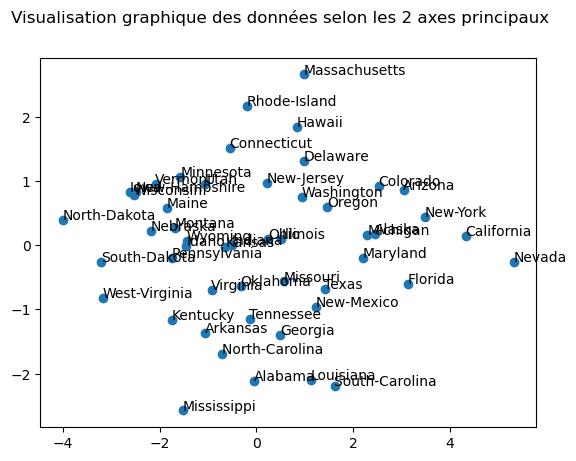

In [21]:
fullAnalysisPCA("./data/crimes.csv", 8)

1/sqrt(p) = 1/sqrt(7) = 0.3779644730092272

# Abscisse
les données utilisables sont :
 - Rapt (0.43)
 - vol (0.39)
 - Attaque (0.39)
 - Viol (0.44)
 - Meutres (proche 0.3)
 - Larcin (proche 0.35)
 - Auto_Theft (proche 0.29)
 
L'axe du x represente l'écart a la moyenne pour chaque ville

# Ordonnée
les données utilisables sont :
 - Meutres (-0.62)
 - Larcin (0.4)
 - Auto_Theft (0.5)
 - Attaque (tres proche -0.34)
 
L'axe de l'ordonnée represente l'influence des types de crimes 
    - les valeurs negatif represente les villes avec plus de meutres et attaque que les autres crimes donc des crimes violents
    - les valeurs positif represente les villes avec plus de larcin et auto_theft que les autres crimes donc des crimes non violents

Ainsi on peut dire que :
 - North-dakota est la ville la plus sure 
 - Mississippi est la ville la plus dangereuse avec le plus de crimes violents
 - Nevada est la ville ou il y a le plus de delit (de tout type)
 - Massachusetts est la ville ou il y a le plus de delit sans violence

#### *Question 4*

Nombres d'axes obtenus :  2
[[ 0.59347855  0.14737886  0.52064694  0.59580992]
 [-0.04048087 -0.95051314  0.30797098  0.00632069]]


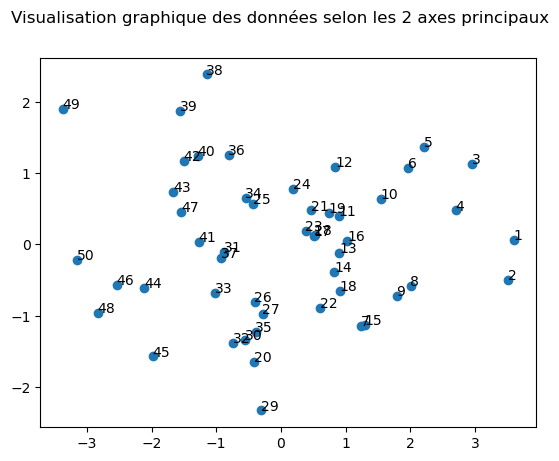

In [25]:
fullAnalysisPCA("./data/50_Startups.csv", 5)

1/sqrt(p) = 1/sqrt(4) = 0.5

# Abscisse
les données utilisables sont :
 - Depenses R&D (0.59)
 - Depenses Marketing Spend (0.52)
 - Depenses benefice (0.59)

les boites qui sont a droite sont des villes qui ont des depenses  en R&D, marketing et benefice elevées
les boites qui sont a gauche sont des villes qui ont des depenses  en R&D, marketing et benefice faibl

# Ordonnée
les données utilisables sont :
 - Depenses Administration (-0.95051314)

Les boites en bas sont des villes qui ont des depenses administratives élevées 
Les boites en haut sont des villes qui ont des depenses administratives faibles

On peut dire que a droite sont principalement des entreprises avec des depenses elevées et un benefice elevé